In [1]:
import numpy as np
import pandas as pd
import math
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

#### Readin Email

In [2]:
emails = pd.read_csv("/Users/ling/Desktop/Interview/SimonData/email_data.csv")
emails.head(2)

,id,event_time,event_type
0,0d170fdf-fc33-43be-9a62-c9b644525cf5,1493146851,email_send
1,1b44fece-d7dd-44f5-9ee9-a4ffe6999c70,1493147858,email_send


In [3]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375626 entries, 0 to 375625
Data columns (total 3 columns):
id            375626 non-null object
event_time    375626 non-null int64
event_type    375626 non-null object
dtypes: int64(1), object(2)
memory usage: 8.6+ MB


In [4]:
emails['id'].nunique()

265736

In [5]:
emails['event_type'].value_counts()

email_send     265737
email_open     101286
email_click      8603
Name: event_type, dtype: int64

In [6]:
send_emails = emails[emails['event_type']=='email_send'].copy()
open_emails = emails[emails['event_type']=='email_open'].copy()
click_emails = emails[emails['event_type']=='email_click'].copy()

# Extract event dt from ts
send_emails['dt']=send_emails['event_time'].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
open_emails['dt']=open_emails['event_time'].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
click_emails['dt']=click_emails['event_time'].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

In [7]:
send_emails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265737 entries, 0 to 265736
Data columns (total 4 columns):
id            265737 non-null object
event_time    265737 non-null int64
event_type    265737 non-null object
dt            265737 non-null object
dtypes: int64(1), object(3)
memory usage: 10.1+ MB


Text(0.5, 1.0, 'Daily Email Opens')

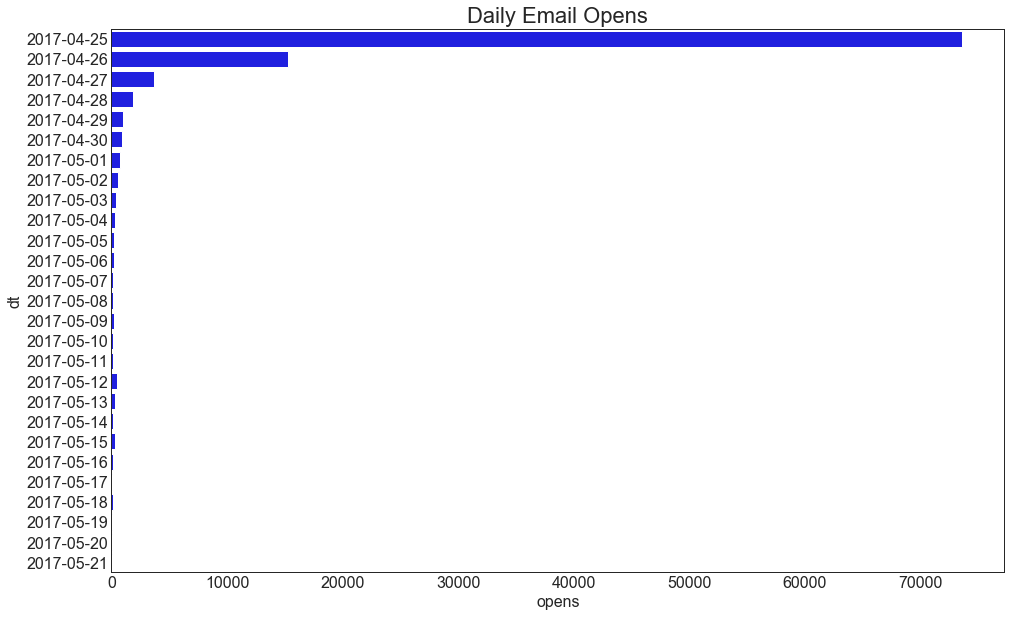

In [8]:
plot_df = open_emails.groupby(['dt']).size().reset_index(name='opens')
plt.figure(figsize=(16,10))
sns.barplot(y='dt', x='opens', color="blue", data=plot_df)
plt.title('Daily Email Opens', fontsize=22)

Text(0.5, 1.0, 'Daily Email Clicks')

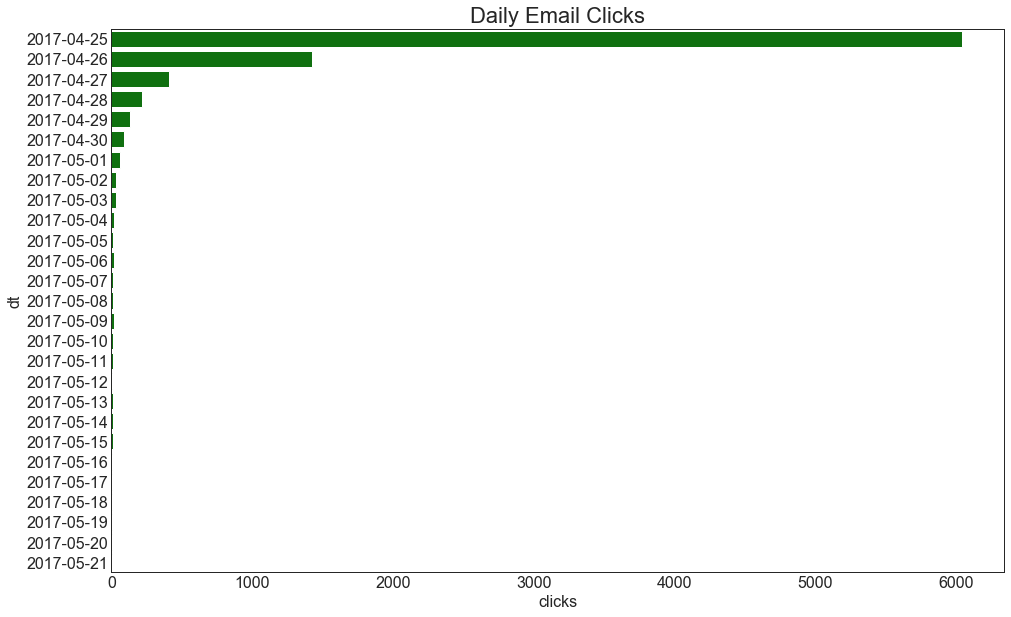

In [9]:
plot_df = click_emails.groupby(['dt']).size().reset_index(name='clicks')
plt.figure(figsize=(16,10))
sns.barplot(y='dt', x='clicks', color="green", data=plot_df)
plt.title('Daily Email Clicks', fontsize=22)

In [10]:
send_opens = pd.merge(send_emails, open_emails, on='id', how='left')
sum(send_opens['event_time_x'] <= send_opens['event_time_y'])

101285

In [11]:
sum(send_opens['event_time_x'] <= send_opens['event_time_y'])/len(send_opens)

0.33634304765952927

In [12]:
send_clicks = pd.merge(send_emails, click_emails, on='id', how='left')
sum(send_clicks['event_time_x'] <= send_clicks['event_time_y'])

8590

In [13]:
sum(send_clicks['event_time_x'] <= send_clicks['event_time_y'])/len(send_clicks)

0.03215349833056342

#### Readin Orders

In [14]:
orders = pd.read_csv("/Users/ling/Desktop/Interview/SimonData/orders.csv")
orders.head(2)

,product,event_type,event_time,id,revenue
0,trinket,promo_order,1492819231,1fd28d09-3636-46a1-960a-351dac621e87,15
1,gizmo,promo_order,1492819639,858754f9-da05-4c2a-ac98-eadc27bcbe81,28


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44193 entries, 0 to 44192
Data columns (total 5 columns):
product       44193 non-null object
event_type    44193 non-null object
event_time    44193 non-null int64
id            44193 non-null object
revenue       44193 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.7+ MB


In [16]:
orders['product'].value_counts()

other      14404
trinket    13918
widget     12241
gizmo       3630
Name: product, dtype: int64

In [17]:
orders['event_type'].value_counts()

promo_order    44193
Name: event_type, dtype: int64

In [18]:
orders['revenue'].describe()

count    44193.000000
mean        73.303170
std         80.512492
min          0.000000
25%         17.000000
50%         30.000000
75%        160.000000
max       1140.000000
Name: revenue, dtype: float64

In [19]:
orders.groupby(['product'])['revenue'].sum()

product
gizmo       109537
other       463683
trinket     279326
widget     2386941
Name: revenue, dtype: int64

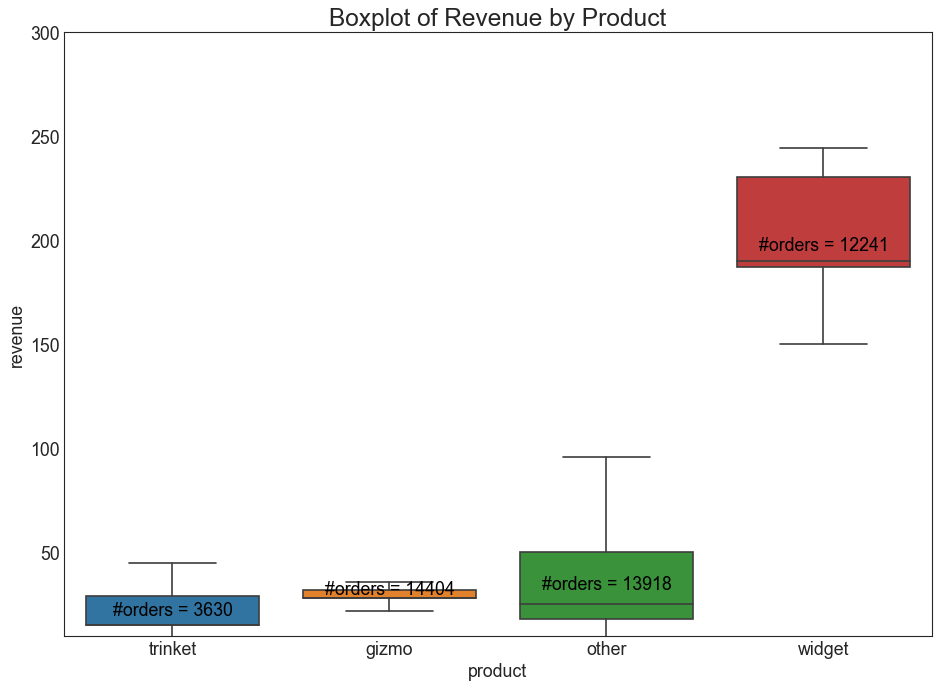

In [20]:
plt.figure(figsize=(14,10), dpi= 80)
sns.boxplot(x='product', y='revenue', data=orders, notch=False, showfliers=False)

# Add N Obs inside boxplot 
def add_n_obs(df,group_col,y):
    mean_dict = {grp[0]:grp[1][y].mean() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, mean_dict[xticklabel], "#orders = "+ str(n_ob), horizontalalignment='center', fontdict={'size':16}, color='black')

add_n_obs(orders,group_col='product',y='revenue')    

# Decoration
plt.title('Boxplot of Revenue by Product', fontsize=22)
plt.ylim(10, 300)
plt.show()

#### Readin Params

In [21]:
params = pd.read_csv("/Users/ling/Desktop/Interview/SimonData/params.csv")
params.head(2)

,id,has_purchased_widget,has_purchased_trinket,has_purchased_gizmo,order_count,first_order_date,last_order_date,lifetime_revenue
0,b559a1d3-5599-4223-92fb-f68d35f8bcb8,f,t,f,1.0,1.485130e+09,1.485130e+09,1700.0
1,fcd46843-a4a3-4c7b-bd89-14847303f566,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
params.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307992 entries, 0 to 1307991
Data columns (total 8 columns):
id                       1307992 non-null object
has_purchased_widget     512207 non-null object
has_purchased_trinket    512207 non-null object
has_purchased_gizmo      512207 non-null object
order_count              512207 non-null float64
first_order_date         512207 non-null float64
last_order_date          512207 non-null float64
lifetime_revenue         512116 non-null float64
dtypes: float64(4), object(4)
memory usage: 79.8+ MB


In [23]:
params['id'].nunique()

1307992

In [24]:
params.groupby(['has_purchased_widget'])['id'].size()

has_purchased_widget
f    106590
t    405617
Name: id, dtype: int64

In [25]:
params.groupby(['has_purchased_widget'])['id'].size()/len(params)

has_purchased_widget
f    0.081491
t    0.310107
Name: id, dtype: float64

In [26]:
params.groupby(['has_purchased_trinket'])['id'].size()

has_purchased_trinket
f    359310
t    152897
Name: id, dtype: int64

In [27]:
params.groupby(['has_purchased_trinket'])['id'].size()/len(params)

has_purchased_trinket
f    0.274704
t    0.116894
Name: id, dtype: float64

In [28]:
params.groupby(['has_purchased_gizmo'])['id'].size()

has_purchased_gizmo
f    461688
t     50519
Name: id, dtype: int64

In [29]:
params.groupby(['has_purchased_gizmo'])['id'].size()/len(params)

has_purchased_gizmo
f    0.352975
t    0.038623
Name: id, dtype: float64

In [30]:
params['order_count'].describe()

count    512207.000000
mean          1.193336
std           1.932172
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         799.000000
Name: order_count, dtype: float64

In [31]:
params['lifetime_revenue'].describe()

count    5.121160e+05
mean     1.708133e+04
std      1.293264e+04
min      4.000000e+02
25%      1.240000e+04
50%      1.700000e+04
75%      2.000000e+04
max      3.552371e+06
Name: lifetime_revenue, dtype: float64

In [32]:
params['first_order_dt']=params['first_order_date'].apply(lambda x: x if np.isnan(x) else datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
params['last_order_dt']=params['last_order_date'].apply(lambda x: x if np.isnan(x) else datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

In [33]:
params['ages']=params['last_order_date'].apply(lambda x: x if np.isnan(x) else datetime.fromtimestamp(x))-params['first_order_date'].apply(lambda x: x if np.isnan(x) else datetime.fromtimestamp(x))
params['ages']=params['ages'].apply(lambda x: max(0, x.days))

In [34]:
params['ages'].describe()

count    1.307992e+06
mean     1.047162e+01
std      6.745490e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.193000e+03
Name: ages, dtype: float64

### Join tables

#### First, join send emails and open emails and aggregate opens per id

In [35]:
send_open_emails = pd.merge(send_emails, open_emails, on='id', how='left')

In [36]:
send_open_emails = send_open_emails[(send_open_emails['event_time_x'] <= send_open_emails['event_time_y']) | (send_open_emails['event_time_y'].isnull())]

In [37]:
send_open_emails.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301131 entries, 0 to 301135
Data columns (total 7 columns):
id              301131 non-null object
event_time_x    301131 non-null int64
event_type_x    301131 non-null object
dt_x            301131 non-null object
event_time_y    101285 non-null float64
event_type_y    101285 non-null object
dt_y            101285 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 18.4+ MB


In [38]:
send_open_emails['isOpen']=send_open_emails['event_time_y'].apply(lambda x: 0 if np.isnan(x) else 1)

In [39]:
send_opens = send_open_emails.groupby('id')['isOpen'].sum().reset_index(name='opens')

In [40]:
send_opens.describe()

,opens
count,265734.000000
mean,0.381152
std,2.163833
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,920.000000


#### Second, join send emails and click emails and aggregate clicks per id

In [41]:
send_click_emails = pd.merge(send_emails, click_emails, on='id', how='left')

In [42]:
send_click_emails = send_click_emails [(send_click_emails ['event_time_x'] <= send_click_emails ['event_time_y']) | (send_click_emails ['event_time_y'].isnull())]

In [43]:
send_click_emails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267143 entries, 0 to 267155
Data columns (total 7 columns):
id              267143 non-null object
event_time_x    267143 non-null int64
event_type_x    267143 non-null object
dt_x            267143 non-null object
event_time_y    8590 non-null float64
event_type_y    8590 non-null object
dt_y            8590 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 16.3+ MB


In [44]:
send_click_emails['isClick']=send_click_emails['event_time_y'].apply(lambda x: 0 if np.isnan(x) else 1)

In [45]:
send_clicks = send_click_emails.groupby('id')['isClick'].sum().reset_index(name='clicks')

In [46]:
send_clicks.describe()

,clicks
count,265723.000000
mean,0.032327
std,0.221902
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,15.000000


#### Third, join send emails and order and aggregate order numbers and revenue

In [47]:
send_order_emails = pd.merge(send_emails, orders, on='id', how='left')

In [48]:
send_order_emails = send_order_emails [(send_order_emails ['event_time_x'] <= send_order_emails ['event_time_y']) | (send_order_emails ['event_time_y'].isnull())]

In [49]:
send_order_emails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266438 entries, 0 to 267997
Data columns (total 8 columns):
id              266438 non-null object
event_time_x    266438 non-null int64
event_type_x    266438 non-null object
dt              266438 non-null object
product         5881 non-null object
event_type_y    5881 non-null object
event_time_y    5881 non-null float64
revenue         5881 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 18.3+ MB


In [50]:
send_order_emails['purchased_widget']=send_order_emails['product'].apply(lambda x: 1 if x=='widget' else 0)
send_order_emails['purchased_trinket']=send_order_emails['product'].apply(lambda x: 1 if x=='trinket' else 0)
send_order_emails['purchased_gizmo']=send_order_emails['product'].apply(lambda x: 1 if x=='gizmo' else 0)
send_order_emails['orders']=send_order_emails['product'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [51]:
send_orders = send_order_emails.groupby('id').agg({'purchased_widget':sum, 
                                                   'purchased_trinket':sum, 
                                                   'purchased_gizmo':sum,
                                                   'orders': sum,
                                                   'revenue': sum
                                                  }).reset_index()

In [52]:
send_orders.describe()

,purchased_widget,purchased_trinket,purchased_gizmo,orders,revenue
count,264634.000000,264634.000000,264634.000000,264634.000000,264634.000000
mean,0.002879,0.009254,0.002520,0.022223,1.006692
std,0.058570,0.107784,0.053707,0.230273,14.928920
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,7.000000,3.000000,46.000000,1650.000000


#### Fourth, join send emails and consumers data

In [53]:
send_consumers = pd.merge(send_emails, params, on='id', how='left')

In [54]:
send_consumers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265737 entries, 0 to 265736
Data columns (total 14 columns):
id                       265737 non-null object
event_time               265737 non-null int64
event_type               265737 non-null object
dt                       265737 non-null object
has_purchased_widget     265709 non-null object
has_purchased_trinket    265709 non-null object
has_purchased_gizmo      265709 non-null object
order_count              265709 non-null float64
first_order_date         265709 non-null float64
last_order_date          265709 non-null float64
lifetime_revenue         265658 non-null float64
first_order_dt           265709 non-null object
last_order_dt            265709 non-null object
ages                     265737 non-null int64
dtypes: float64(4), int64(2), object(8)
memory usage: 30.4+ MB


In [55]:
send_consumers.head(2)

,id,event_time,event_type,dt,has_purchased_widget,has_purchased_trinket,has_purchased_gizmo,order_count,first_order_date,last_order_date,lifetime_revenue,first_order_dt,last_order_dt,ages
0,0d170fdf-fc33-43be-9a62-c9b644525cf5,1493146851,email_send,2017-04-25,t,t,t,11.0,1.473984e+09,1.494547e+09,141000.0,2016-09-15,2017-05-11,238
1,1b44fece-d7dd-44f5-9ee9-a4ffe6999c70,1493147858,email_send,2017-04-25,t,f,f,2.0,1.425427e+09,1.429142e+09,36000.0,2015-03-03,2015-04-15,43


#### Fifth, merge all tables together

In [80]:
df = pd.merge(send_consumers, send_orders, on='id', how='left')
df = pd.merge(df, send_opens, on='id', how='left')
df = pd.merge(df, send_clicks, on='id', how='left')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265737 entries, 0 to 265736
Data columns (total 21 columns):
id                       265737 non-null object
event_time               265737 non-null int64
event_type               265737 non-null object
dt                       265737 non-null object
has_purchased_widget     265709 non-null object
has_purchased_trinket    265709 non-null object
has_purchased_gizmo      265709 non-null object
order_count              265709 non-null float64
first_order_date         265709 non-null float64
last_order_date          265709 non-null float64
lifetime_revenue         265658 non-null float64
first_order_dt           265709 non-null object
last_order_dt            265709 non-null object
ages                     265737 non-null int64
purchased_widget         264635 non-null float64
purchased_trinket        264635 non-null float64
purchased_gizmo          264635 non-null float64
orders                   264635 non-null float64
revenue            

In [82]:
df.head(2)

,id,event_time,event_type,dt,has_purchased_widget,has_purchased_trinket,has_purchased_gizmo,order_count,first_order_date,last_order_date,...,first_order_dt,last_order_dt,ages,purchased_widget,purchased_trinket,purchased_gizmo,orders,revenue,opens,clicks
0,0d170fdf-fc33-43be-9a62-c9b644525cf5,1493146851,email_send,2017-04-25,t,t,t,11.00,"1,473,984,000.00","1,494,547,200.00",...,2016-09-15,2017-05-11,238,3.00,2.00,2.00,12.00,774.00,14.00,4.00
1,1b44fece-d7dd-44f5-9ee9-a4ffe6999c70,1493147858,email_send,2017-04-25,t,f,f,2.00,"1,425,427,200.00","1,429,142,400.00",...,2015-03-03,2015-04-15,43,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [83]:
df['has_purchased_widget'] = df['has_purchased_widget'].apply(lambda x: 1.12 if x=='t' else 0.50)
df['has_purchased_trinket'] = df['has_purchased_trinket'].apply(lambda x: 1.99 if x=='t' else 0.60)
df['has_purchased_gizmo'] = df['has_purchased_gizmo'].apply(lambda x: 3.23 if x=='t' else 0.74)

In [59]:
### change categorical to binary variables
# df['has_purchased_gizmo'] = (df['has_purchased_gizmo']=='t')
# # df['has_purchased'] = df.apply(lambda x: True if (x['has_purchased_widget'] or x['has_purchased_trinket'] or x['has_purchased_gizmo']) else False)
# df['has_purchased'] = (df['has_purchased_widget']) | (df['has_purchased_trinket']) | df['has_purchased_gizmo']

In [84]:
### fill in missing
df['order_count']=df['order_count'].fillna(0)
df['lifetime_revenue']=df['lifetime_revenue'].fillna(0)
df['ages']=df['ages'].fillna(0)
df['opens']=df['opens'].fillna(0)
df['clicks']=df['clicks'].fillna(0)

In [85]:
### replace outliers 
def replace(series):
    mean, std, cutpoint = series.mean(), series.std(), series.quantile(.99)
    outliers = (series - mean).abs() > 3*std
    value = int(cutpoint + 1)
    series=series.where(~outliers, value)
    return(series)

num_attribs =[
    'order_count',
    'lifetime_revenue',
    'ages',
    'opens',
    'clicks'
]
df[num_attribs] = df[num_attribs].apply(lambda x: replace(x), axis=0)

In [86]:
df.drop(['event_time', 'event_type', 'dt', 'first_order_date', 'last_order_date', 'first_order_dt', 'last_order_dt'], 1, inplace=True)

In [87]:
df.describe()

,has_purchased_widget,has_purchased_trinket,has_purchased_gizmo,order_count,lifetime_revenue,ages,purchased_widget,purchased_trinket,purchased_gizmo,orders,revenue,opens,clicks
count,"265,737.00","265,737.00","265,737.00","265,737.00","265,737.00","265,737.00","264,635.00","264,635.00","264,635.00","264,635.00","264,635.00","265,737.00","265,737.00"
mean,1.01,1.01,1.01,1.20,"17,592.43",31.20,0.00,0.01,0.00,0.02,1.01,0.35,0.05
std,0.24,0.63,0.77,0.53,"9,396.87",108.19,0.06,0.11,0.05,0.23,14.93,0.76,0.32
min,0.50,0.60,0.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.12,0.60,0.74,1.00,"15,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.12,0.60,0.74,1.00,"17,389.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.12,1.99,0.74,1.00,"20,500.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.12,1.99,3.23,5.00,"53,001.00",557.00,6.00,7.00,3.00,46.00,"1,650.00",6.00,2.00


In [88]:
df['flag'] = df['orders']>=1
pd.options.display.float_format ='{0:,.2f}'.format

In [89]:
df[df['flag']==True].describe()

,has_purchased_widget,has_purchased_trinket,has_purchased_gizmo,order_count,lifetime_revenue,ages,purchased_widget,purchased_trinket,purchased_gizmo,orders,revenue,opens,clicks
count,"4,078.00","4,078.00","4,078.00","4,078.00","4,078.00","4,078.00","4,078.00","4,078.00","4,078.00","4,078.00","4,078.00","4,078.00","4,078.00"
mean,0.98,1.60,1.50,2.57,"24,333.11",292.59,0.19,0.60,0.16,1.44,65.33,1.17,0.52
std,0.26,0.62,1.15,0.82,"13,984.37",202.24,0.43,0.63,0.40,1.18,101.31,1.52,0.88
min,0.50,0.60,0.74,2.00,"2,200.00",13.00,0.00,0.00,0.00,1.00,9.00,0.00,0.00
25%,1.12,0.60,0.74,2.00,"17,400.00",113.00,0.00,0.00,0.00,1.00,15.00,0.00,0.00
50%,1.12,1.99,0.74,2.00,"22,200.00",241.00,0.00,1.00,0.00,1.00,28.00,1.00,0.00
75%,1.12,1.99,3.23,3.00,"32,375.00",557.00,0.00,1.00,0.00,2.00,52.00,2.00,2.00
max,1.12,1.99,3.23,5.00,"53,001.00",557.00,6.00,7.00,3.00,46.00,"1,650.00",6.00,2.00


In [90]:
df[df['flag']==False].describe()

,has_purchased_widget,has_purchased_trinket,has_purchased_gizmo,order_count,lifetime_revenue,ages,purchased_widget,purchased_trinket,purchased_gizmo,orders,revenue,opens,clicks
count,"261,659.00","261,659.00","261,659.00","261,659.00","261,659.00","261,659.00","260,557.00","260,557.00","260,557.00","260,557.00","260,557.00","261,659.00","261,659.00"
mean,1.01,1.00,1.00,1.18,"17,487.37",27.13,0.00,0.00,0.00,0.00,0.00,0.34,0.05
std,0.24,0.63,0.76,0.49,"9,268.82",100.84,0.00,0.00,0.00,0.00,0.00,0.73,0.30
min,0.50,0.60,0.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.12,0.60,0.74,1.00,"15,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.12,0.60,0.74,1.00,"17,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.12,1.99,0.74,1.00,"20,100.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.12,1.99,3.23,5.00,"53,001.00",557.00,0.00,0.00,0.00,0.00,0.00,6.00,2.00


In [92]:
# from numpy import dot
# from numpy.linalg import norm

# y=df['flag'].apply(lambda s: 1 if s else 0)
# for col in ['flag','has_purchased_widget', 'has_purchased_trinket', 'has_purchased_gizmo', 'has_purchased']:
#     x = df[col].apply(lambda s: 1 if s else 0)
#     cos_sim = dot(x, y)/(norm(x)*norm(y))
#     print([col, cos_sim])

### ML Models

In [93]:
from sklearn.model_selection import train_test_split

/Users/ling/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/ling/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [94]:
df.describe()

,has_purchased_widget,has_purchased_trinket,has_purchased_gizmo,order_count,lifetime_revenue,ages,purchased_widget,purchased_trinket,purchased_gizmo,orders,revenue,opens,clicks
count,"265,737.00","265,737.00","265,737.00","265,737.00","265,737.00","265,737.00","264,635.00","264,635.00","264,635.00","264,635.00","264,635.00","265,737.00","265,737.00"
mean,1.01,1.01,1.01,1.20,"17,592.43",31.20,0.00,0.01,0.00,0.02,1.01,0.35,0.05
std,0.24,0.63,0.77,0.53,"9,396.87",108.19,0.06,0.11,0.05,0.23,14.93,0.76,0.32
min,0.50,0.60,0.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.12,0.60,0.74,1.00,"15,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.12,0.60,0.74,1.00,"17,389.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.12,1.99,0.74,1.00,"20,500.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.12,1.99,3.23,5.00,"53,001.00",557.00,6.00,7.00,3.00,46.00,"1,650.00",6.00,2.00


In [95]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [96]:
y_train = (train_set['flag']==True)
y_train.describe()

count     212589
unique         2
top        False
freq      209293
Name: flag, dtype: object

In [97]:
y_test = (test_set['flag']==True)
y_test.describe()

count     53148
unique        2
top       False
freq      52366
Name: flag, dtype: object

In [98]:
del_attribs =[
 'id',
 'flag',
 'purchased_widget',
 'purchased_trinket',
 'purchased_gizmo',
 'orders',
 'revenue'
]

In [99]:
train_set = train_set.drop(del_attribs, 1)
train_set.head(2)

,has_purchased_widget,has_purchased_trinket,has_purchased_gizmo,order_count,lifetime_revenue,ages,opens,clicks
142309,1.12,0.60,0.74,1.00,"17,000.00",0,0.00,0.00
59897,1.12,1.99,3.23,1.00,"26,400.00",0,0.00,0.00


In [100]:
test_set = test_set.drop(del_attribs, 1)
test_set.head(2)

,has_purchased_widget,has_purchased_trinket,has_purchased_gizmo,order_count,lifetime_revenue,ages,opens,clicks
221806,1.12,0.60,0.74,1.00,"22,000.00",0,5.00,2.00
184534,0.50,0.60,0.74,1.00,"4,500.00",0,0.00,0.00


In [101]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

In [102]:
def display_scores(obs, pred):
    precision=precision_score(obs, pred)
    recall=recall_score(obs, pred)
    f1=f1_score(obs, pred)
    print("precision", precision)
    print("recall", recall)
    print("f1", f1)

In [103]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

### Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
# tree_clf = DecisionTreeClassifier()
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(train_set, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
y_train_pred = cross_val_predict(tree_clf, train_set, y_train, cv=10)
y_test_pred = cross_val_predict(tree_clf, test_set, y_test, cv=10)

In [107]:
from sklearn.tree import export_graphviz

In [108]:
attrib=list(train_set)
export_graphviz(
        tree_clf,
        out_file="tree_clf1.dot",
        feature_names=attrib,
        rounded=True,
        filled=True
    )

In [109]:
!dot -Tpng tree_clf1.dot -o tree_clf1.png

In [110]:
display_scores(y_train, y_train_pred)

precision 0.5764925373134329
recall 0.09375
f1 0.16127348643006262


In [111]:
display_scores(y_test, y_test_pred)

precision 0.5813953488372093
recall 0.0959079283887468
f1 0.1646542261251372


In [112]:
roc_auc_score(y_train, y_train_pred)

0.546332698059658

In [113]:
y_test=0+np.array(y_test)
y_test_pred=0+np.array(y_test_pred)
roc_auc_score(y_test, y_test_pred)

0.5474383624680624

### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

/Users/ling/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [115]:
forest_clf = RandomForestClassifier(n_estimators=100, max_depth= 5, max_features = None)
forest_clf.fit(train_set, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
y_train_pred = cross_val_predict(forest_clf, train_set, y_train, cv=10)
y_test_pred = cross_val_predict(forest_clf, test_set, y_test, cv=10)

In [117]:
display_scores(y_train, y_train_pred)

precision 0.5563025210084034
recall 0.1004247572815534
f1 0.17013621177075303


In [118]:
display_scores(y_test, y_test_pred)

precision 0.5377358490566038
recall 0.07289002557544758
f1 0.1283783783783784


In [119]:
roc_auc_score(y_train, y_train_pred)

0.5495816838731543

In [120]:
y_test=0+np.array(y_test)
y_test_pred=0+np.array(y_test_pred)
roc_auc_score(y_test, y_test_pred)

0.5359771519619972

In [121]:
attrib=list(train_set)
pd.DataFrame({'feature':attrib,'coef':forest_clf.feature_importances_}).sort_values(by='coef', ascending=False)

,feature,coef
5,ages,0.55
7,clicks,0.33
3,order_count,0.04
6,opens,0.04
4,lifetime_revenue,0.03
1,has_purchased_trinket,0.00
2,has_purchased_gizmo,0.00
0,has_purchased_widget,0.00


### LightGBM

In [122]:
import lightgbm as lgb

/Users/ling/miniconda3/lib/python3.7/site-packages/lightgbm/__init__.py:30: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/ling/miniconda3/lib/python3.7/site-packages/lightgbm/VERSION.txt' mode='r' encoding='UTF-8'>
  __version__ = open(os.path.join(dir_path, 'VERSION.txt')).read().strip()
/Users/ling/miniconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", User

In [123]:
#Select Hyper-Parameters
params = {'metric' : 'binary_logloss',
          'objective':'binary',
          'boosting_type' : 'gbdt',
          'colsample_bytree' : 0.9234,
          'num_leaves' : 10,
          'max_depth' : -1,
          'n_estimators' : 200,
          'min_child_samples': 399, 
          'min_child_weight': 0.1,
          'reg_alpha': 2,
          'reg_lambda': 5,
          'subsample': 0.855,
          'verbose' : -1,
          'num_threads' : 4
}

In [124]:
lgb_train = lgb.Dataset(train_set, y_train)
lgb_eval = lgb.Dataset(test_set, y_test, reference=lgb_train)

lgbm = lgb.train(params,
                 lgb_train,
                 100,
                 lgb_eval,
                 early_stopping_rounds= 30,
                 verbose_eval= 10
                 )

/Users/ling/miniconda3/lib/python3.7/site-packages/lightgbm/engine.py:116: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 30 rounds.
[10]	valid_0's binary_logloss: 0.0464782
[20]	valid_0's binary_logloss: 0.0425271
[30]	valid_0's binary_logloss: 0.041268
[40]	valid_0's binary_logloss: 0.0408151
[50]	valid_0's binary_logloss: 0.0406197
[60]	valid_0's binary_logloss: 0.0405406
[70]	valid_0's binary_logloss: 0.0405021
[80]	valid_0's binary_logloss: 0.0404788
[90]	valid_0's binary_logloss: 0.0404428
[100]	valid_0's binary_logloss: 0.0403939
[110]	valid_0's binary_logloss: 0.0403968
[120]	valid_0's binary_logloss: 0.0403446
[130]	valid_0's binary_logloss: 0.0403543
[140]	valid_0's binary_logloss: 0.0403417
[150]	valid_0's binary_logloss: 0.0403017
[160]	valid_0's binary_logloss: 0.0402879
[170]	valid_0's binary_logloss: 0.0402807
[180]	valid_0's binary_logloss: 0.0402386
[190]	valid_0's binary_logloss: 0.0402214
[200]	valid_0's binary_logloss: 0.0402108
Did not meet early stopping. Best iteration is:
[199]	valid_0's binary_logloss: 0.0402074


In [125]:
perf = pd.DataFrame({'feature': lgbm.feature_name(),
                     'importances':list(lgbm.feature_importance())}).sort_values(by='importances', ascending=False)
perf

,feature,importances
4,lifetime_revenue,828
5,ages,577
6,opens,184
3,order_count,118
7,clicks,32
1,has_purchased_trinket,29
0,has_purchased_widget,14
2,has_purchased_gizmo,9


In [126]:
lgbm.save_model('model.txt')

In [159]:
gbm_clf =  lgb.LGBMClassifier(boosting_type='gbdt', objective = 'binary', n_estimators = 100, max_depth=4, learning_rate=0.1,  num_leaves = 10)

In [160]:
y_train_pred = cross_val_predict(gbm_clf, train_set, y_train, cv=10)
y_test_pred = cross_val_predict(gbm_clf, test_set, y_test, cv=10)

In [161]:
display_scores(y_train, y_train_pred)

precision 0.5680473372781065
recall 0.11650485436893204
f1 0.1933534743202417


In [162]:
display_scores(y_test, y_test_pred)

precision 0.5238095238095238
recall 0.11253196930946291
f1 0.18526315789473682


In [163]:
y_train=0+np.array(y_train)
y_train_pred=[0 if x<=0.5 else 1 for x in y_train_pred]
roc_auc_score(y_train, y_train_pred)

0.5575548405475502

In [164]:
y_test=0+np.array(y_test)
y_test_pred=0+np.array(y_test_pred)
roc_auc_score(y_test, y_test_pred)

0.5555021302453819

### Profiling Consumers by Bucket

In [133]:
# Predict score data set
gbm_clf = lgb.LGBMClassifier(boosting_type='gbdt', objective = 'binary', n_estimators = 100, max_depth=5, learning_rate=0.1,  num_leaves = 10)
lgbm_clf = gbm_clf.fit(train_set, y_train)

In [134]:
y_hat = lgbm_clf.predict(df[train_set.columns])
y_hat_1 =  pd.DataFrame(lgbm_clf.predict_proba(df[train_set.columns]))[1]
df['y_hat'] = y_hat
df['y_hat_prob'] = [y if y>0 else 0 for y in y_hat_1]

In [135]:
df['y_hat_bucket']=pd.cut(df['y_hat_prob'], 10)

In [136]:
df.head(2)

,id,has_purchased_widget,has_purchased_trinket,has_purchased_gizmo,order_count,lifetime_revenue,ages,purchased_widget,purchased_trinket,purchased_gizmo,orders,revenue,opens,clicks,flag,y_hat,y_hat_prob,y_hat_bucket
0,0d170fdf-fc33-43be-9a62-c9b644525cf5,1.12,1.99,3.23,4.00,"53,001.00",238,3.00,2.00,2.00,12.00,774.00,5.00,2.00,True,1,0.59,"(0.529, 0.617]"
1,1b44fece-d7dd-44f5-9ee9-a4ffe6999c70,1.12,0.60,0.74,2.00,"36,000.00",43,0.00,0.00,0.00,0.00,0.00,1.00,0.00,False,0,0.05,"(-0.00088, 0.0881]"


In [137]:
df.groupby(['y_hat_bucket']).size()

y_hat_bucket
(-0.00088, 0.0881]    247740
(0.0881, 0.176]        13035
(0.176, 0.264]          2099
(0.264, 0.352]           765
(0.352, 0.441]          1011
(0.441, 0.529]           450
(0.529, 0.617]           279
(0.617, 0.705]           166
(0.705, 0.793]           138
(0.793, 0.881]            54
dtype: int64

In [138]:
pd.concat([df.groupby(['y_hat_bucket']).size(), df.groupby(['y_hat_bucket'])['flag','y_hat_prob','has_purchased_widget', 'has_purchased_trinket', 'has_purchased_gizmo','order_count', 'lifetime_revenue', 'ages', 'opens', 'clicks'].mean()], axis=1)

,0,flag,y_hat_prob,has_purchased_widget,has_purchased_trinket,has_purchased_gizmo,order_count,lifetime_revenue,ages,opens,clicks
y_hat_bucket,,,,,,,,,,,
"(-0.00088, 0.0881]",247740,0.00,0.00,1.01,0.96,0.97,1.10,"17,077.17",8.99,0.31,0.04
"(0.0881, 0.176]",13035,0.12,0.12,1.00,1.59,1.45,2.43,"24,690.08",343.12,0.49,0.01
"(0.176, 0.264]",2099,0.22,0.21,0.94,1.76,1.84,3.42,"28,150.97",359.53,1.22,0.05
"(0.264, 0.352]",765,0.31,0.30,0.93,1.68,1.63,3.16,"24,809.39",329.19,1.66,0.60
"(0.352, 0.441]",1011,0.41,0.39,1.02,1.68,1.46,2.49,"22,243.03",298.65,1.47,1.87
"(0.441, 0.529]",450,0.47,0.48,0.94,1.67,1.44,2.54,"20,819.19",265.52,2.85,1.97
"(0.529, 0.617]",279,0.64,0.56,0.86,1.65,1.38,2.38,"17,486.71",242.39,3.55,2.00
"(0.617, 0.705]",166,0.54,0.66,0.97,1.69,1.66,2.73,"22,584.31",268.46,4.03,1.99
"(0.705, 0.793]",138,0.75,0.75,0.96,1.85,1.91,3.38,"21,487.00",299.14,4.07,2.00


In [139]:
df.groupby(['y_hat_bucket'])['y_hat_prob','lifetime_revenue','order_count', 'orders', 'revenue'].mean()

,y_hat_prob,lifetime_revenue,order_count,orders,revenue
y_hat_bucket,,,,,
"(-0.00088, 0.0881]",0.00,"17,077.17",1.10,0.00,0.27
"(0.0881, 0.176]",0.12,"24,690.08",2.43,0.18,8.79
"(0.176, 0.264]",0.21,"28,150.97",3.42,0.38,17.05
"(0.264, 0.352]",0.30,"24,809.39",3.16,0.52,22.04
"(0.352, 0.441]",0.39,"22,243.03",2.49,0.68,18.49
"(0.441, 0.529]",0.48,"20,819.19",2.54,0.76,22.38
"(0.529, 0.617]",0.56,"17,486.71",2.38,1.05,26.98
"(0.617, 0.705]",0.66,"22,584.31",2.73,0.80,23.02
"(0.705, 0.793]",0.75,"21,487.00",3.38,1.30,30.15


In [140]:
df.groupby(['y_hat_bucket'])['has_purchased_widget','has_purchased_trinket','has_purchased_gizmo','purchased_widget', 'purchased_trinket', 'purchased_gizmo'].mean()

,has_purchased_widget,has_purchased_trinket,has_purchased_gizmo,purchased_widget,purchased_trinket,purchased_gizmo
y_hat_bucket,,,,,,
"(-0.00088, 0.0881]",1.01,0.96,0.97,0.00,0.00,0.00
"(0.0881, 0.176]",1.00,1.59,1.45,0.03,0.07,0.02
"(0.176, 0.264]",0.94,1.76,1.84,0.04,0.15,0.04
"(0.264, 0.352]",0.93,1.68,1.63,0.06,0.23,0.06
"(0.352, 0.441]",1.02,1.68,1.46,0.03,0.38,0.08
"(0.441, 0.529]",0.94,1.67,1.44,0.04,0.42,0.07
"(0.529, 0.617]",0.86,1.65,1.38,0.04,0.57,0.12
"(0.617, 0.705]",0.97,1.69,1.66,0.05,0.40,0.13
"(0.705, 0.793]",0.96,1.85,1.91,0.02,0.73,0.20
